In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Replace 'your_file.csv' with the path to your CSV file
csv_file_path = "log.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

df = df[df['Result'] == 'SUCCESS']
df = df[df['Cities'] == 2]

def filter_data(df, encoding, height):
    return df[(df['Encoding'] == encoding) & (df['Height'] == height)]

def plot_data(ax, df, encoding_label, height):
    ax.plot(df['Trains'], df['Success'], marker='o', label=encoding_label)

def setup_plot(ax, height):
    ax.set_xlim(left=0)
    ax.set_ylim(bottom=1)
    ax.set_yscale('log')
    ax.set_xlabel('Trains')
    ax.set_title(f'Success vs Trains for Different Encodings (Height = {height})')
    ax.legend()
    ax.grid(True)

# Display the first few rows of the DataFrame to confirm the data has been loaded correctly
df.head()

,Encoding,Height,Width,Cities,Trains,Result,Success,Failures,Detailed Failures,Solving Proportion,Given Horizon,Resulting Horizon
0,encodings/multiple/grid/,50,50,2,5,SUCCESS,316,5,UNSATISFIABLE:UNSATISFIABLE:UNSATISFIABLE:UNSA...,0.001979,71,49
1,encodings/multiple/grid/,50,50,2,10,SUCCESS,65,6,UNSATISFIABLE:UNSATISFIABLE:UNSATISFIABLE:UNSA...,0.003844,74,57
2,encodings/multiple/grid/,50,50,2,15,SUCCESS,30,3,UNSATISFIABLE:MEMORY:MEMORY,0.006186,74,62
3,encodings/multiple/grid/,50,50,2,20,SUCCESS,22,3,MEMORY:UNSATISFIABLE:MEMORY,0.010499,66,58
4,encodings/multiple/grid/,50,50,2,25,SUCCESS,17,1,MEMORY,0.015099,64,58


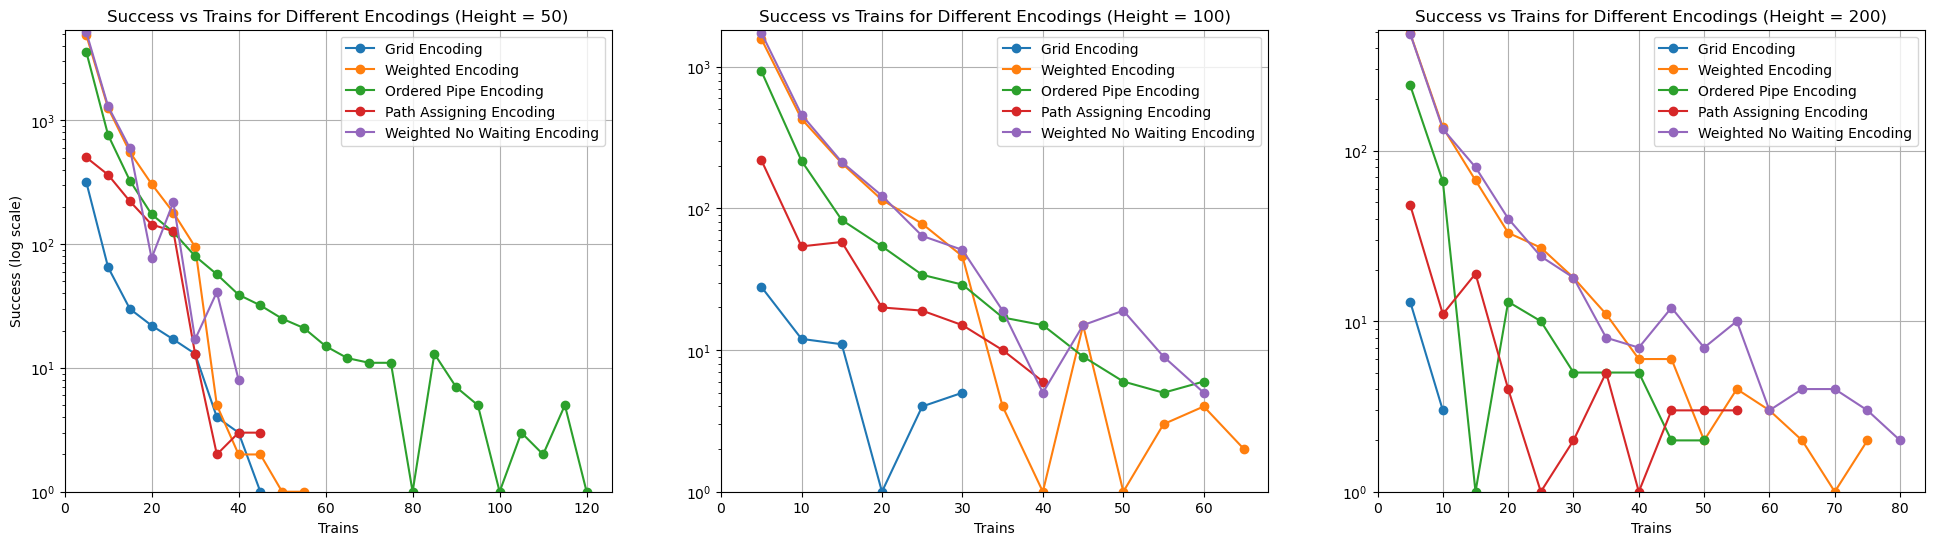

In [20]:
encodings = [
    ('encodings/multiple/grid/', 'Grid Encoding'),
    ('encodings/multiple/weighted/', 'Weighted Encoding'),
    ('encodings/multiple/ordered_pipe/', 'Ordered Pipe Encoding'),
    ('encodings/multiple/path_assigning/', 'Path Assigning Encoding'),
    ('encodings/multiple/weighted_no_waiting/', 'Weighted No Waiting Encoding')
]

heights = [50, 100, 200]

# Create a figure with three subplots side by side
fig, axs = plt.subplots(1, 3, figsize=(24, 6))

for i, height in enumerate(heights):
    for encoding, label in encodings:
        df_filtered = filter_data(df, encoding, height)
        plot_data(axs[i], df_filtered, label, height)
    setup_plot(axs[i], height)

axs[0].set_ylabel('Success (log scale)')

# Show the plots
plt.show()

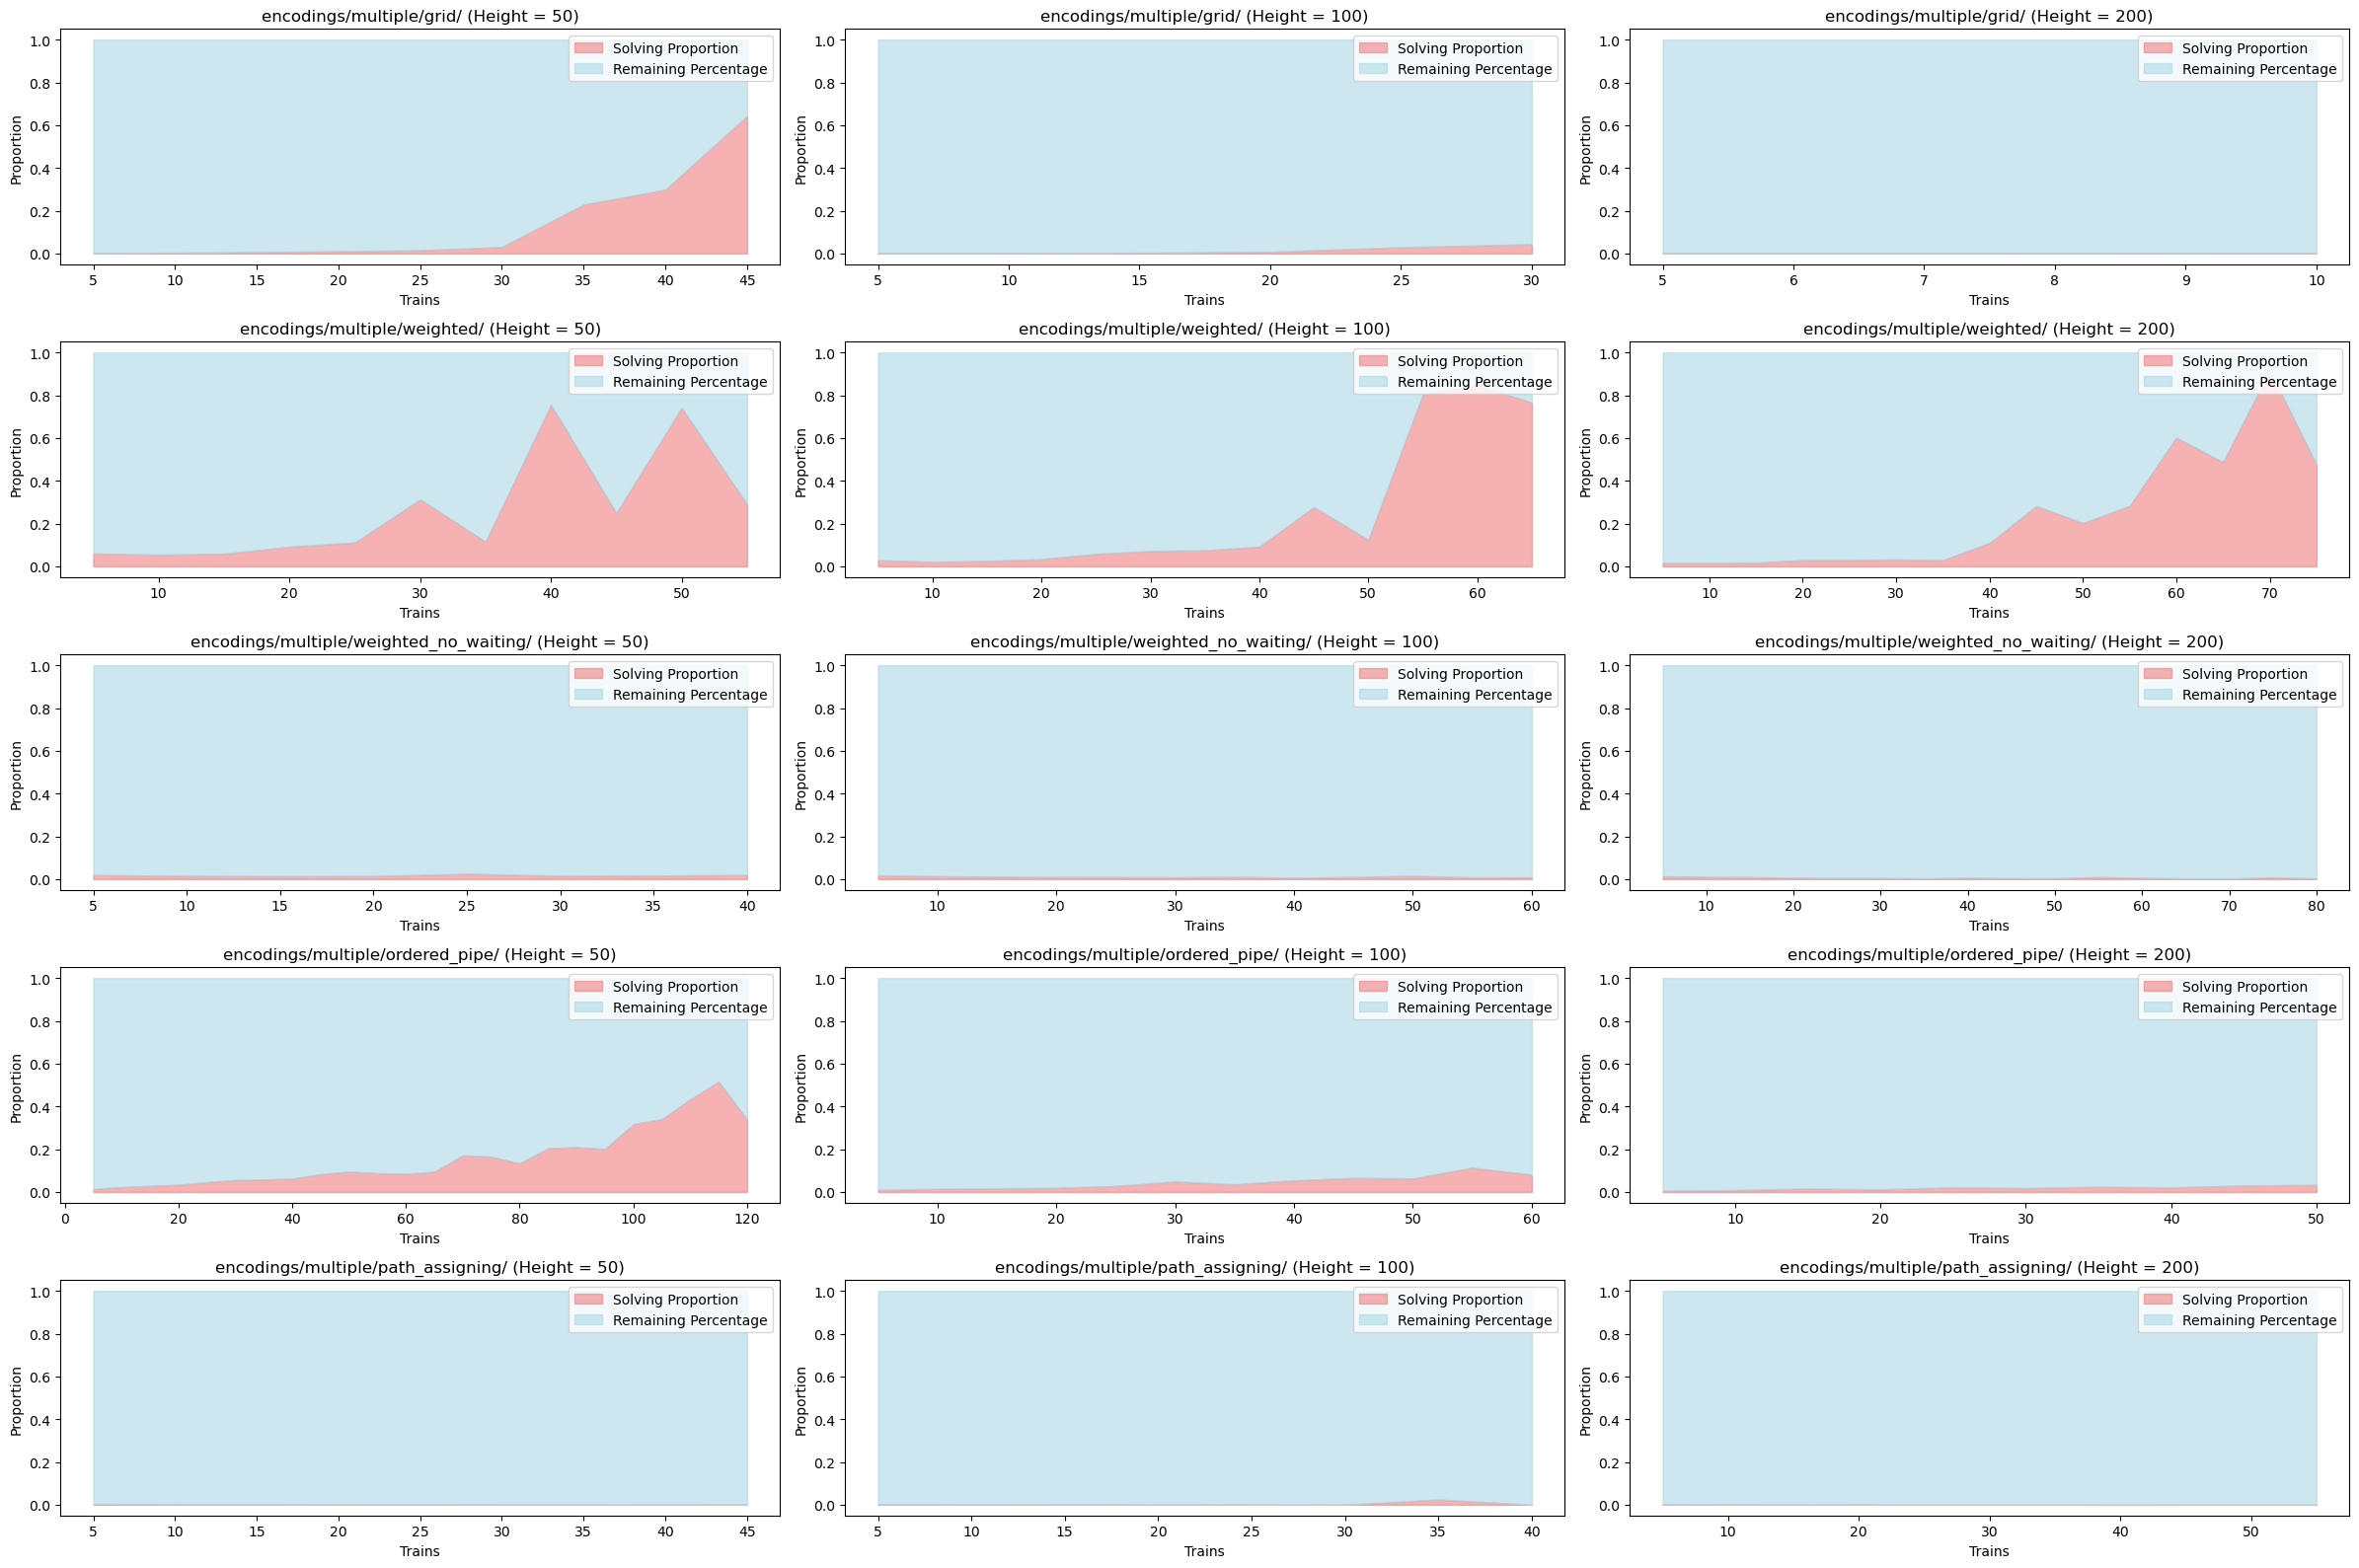

In [21]:
# Create a list of encodings and heights to iterate through
encodings = ["encodings/multiple/grid/", "encodings/multiple/weighted/", "encodings/multiple/weighted_no_waiting/", "encodings/multiple/ordered_pipe/", "encodings/multiple/path_assigning/"]
heights = [50, 100, 200]

# Create a figure with four rows and three columns (4 encodings x 3 heights)
fig, axs = plt.subplots(len(encodings), len(heights), figsize=(24, 16))

# Iterate through each encoding and height
for i, encoding in enumerate(encodings):
    for j, height in enumerate(heights):
        # Filter the DataFrame for the current encoding and height
        df_filtered = df[(df["Encoding"] == encoding) & (df['Height'] == height)]
        
        # Extract the "Trains" and "Solving Proportion" columns
        trains = df_filtered["Trains"]
        solving_proportion = df_filtered["Solving Proportion"]
        remaining_percentage = 1 - solving_proportion
        
        # Plot the solving proportion and remaining percentage
        axs[i, j].fill_between(trains, solving_proportion, color='lightcoral', alpha=0.6, label='Solving Proportion')
        axs[i, j].fill_between(trains, solving_proportion, 1, color='lightblue', alpha=0.6, label='Remaining Percentage')
        axs[i, j].set_xlabel('Trains')
        axs[i, j].set_ylabel('Proportion')
        axs[i, j].set_title(f'{encoding} (Height = {height})')
        axs[i, j].legend()
        
# Adjust layout and show the plots
plt.tight_layout()
plt.show()